# Mushroom Classification - Modelos Supervisados
## Por:
- Sebastian Vélez Jaramillo
- Santiago Ruiz Ramirez
- Edison Camilo Garatejo Vargas
- Sebastian López Valencia

## Montaje almacenamiento

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd

## Lectura de datos

In [ ]:
data_dropped = pd.read_csv("/content/drive/MyDrive/datasets/AprendizajeAutomatico/Proyecto/mushrooms_dropped.csv")

In [ ]:
data_dropped = data_dropped.loc[:, ~data_dropped.columns.str.contains('^Unnamed')]

Columna detectada

In [ ]:
data_dropped

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,0,0,2,2,5,5,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,0,0,2,2,5,5,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,0,0,2,2,5,5,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,1,0,2,1,7,7,1,0,7,4,2


In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Separar datos

In [ ]:
X = data_dropped.loc[:, ~data_dropped.columns.str.contains('class')]

In [ ]:
Y = data_dropped.loc[:,'class']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(
...     X, Y, test_size=0.33, random_state=42)

## Regresión logística

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression(random_state=0, max_iter=1000).fit(X_train, Y_train)

In [ ]:
from sklearn.metrics import plot_confusion_matrix

### Metricas

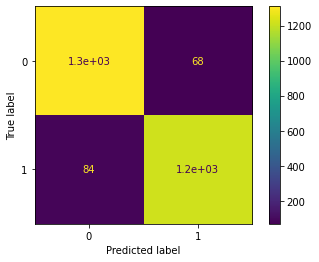

In [ ]:
plot_confusion_matrix(clf, X_test, Y_test)  

In [ ]:
from sklearn.metrics import plot_roc_curve

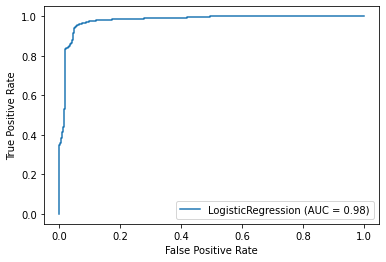

In [ ]:
plot_roc_curve(clf, X_test, Y_test) 

In [ ]:
precision = clf.score(X_test,Y_test)

In [ ]:
f"La precisión (accuracy) del modelo es del {precision*100}%"

'La precisión (accuracy) del modelo es del 94.33047370384186%'

In [ ]:
clf.coef_

array([[-0.02764522,  0.4739852 , -0.0539561 , -0.76173103, -0.55743837,
         1.8848036 , -5.69341778,  6.55076072, -0.12030012,  0.22348789,
        -1.21391678, -4.09726689, -0.43334402, -0.15183605, -0.06498432,
         0.74140959,  0.67652475, -0.06411148, -0.17754291,  0.09666128]])

In [ ]:
from  sklearn.metrics import f1_score, recall_score

In [ ]:
Y_pred = clf.predict(X_test)

In [ ]:
Y_pred

array([0, 1, 1, ..., 0, 1, 0])

In [ ]:
f1_score(Y_test, Y_pred)

0.9413127413127413

In [ ]:
recall_score(Y_test, Y_pred)

0.9355333844973139

### Validación cruzada - Hacerlo al final con todos los modelos para ver el más efectivo

In [ ]:
scoring = ['precision_macro', 'recall_macro']
from sklearn.model_selection import cross_validate

In [ ]:
scores = cross_validate(clf, X, Y, scoring=scoring)

In [ ]:
 sorted(scores.keys())

['fit_time', 'score_time', 'test_precision_macro', 'test_recall_macro']

In [ ]:
scores

{'fit_time': array([0.49944425, 0.498564  , 0.56336689, 0.58363819, 0.70603824]),
 'score_time': array([0.00867867, 0.01149344, 0.00688481, 0.00599957, 0.00751877]),
 'test_precision_macro': array([0.6220256 , 0.97973373, 0.9032567 , 0.99812996, 0.73557057]),
 'test_recall_macro': array([0.61991616, 0.97959838, 0.87100894, 0.99817378, 0.66342978])}

### Tuneo de parametros

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters = {'penalty':('l1', 'l2','elasticnet'), 'C':[1, 10], 'fit_intercept':(True, False), 'solver': ('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga')}

In [ ]:
lrm = LogisticRegression(max_iter=1000)

In [ ]:
clf = GridSearchCV(lrm, parameters)

In [ ]:
clf.fit(X,Y)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=1000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10], 'fit_intercept': (True, False),
                         'penalty': ('l1', 'l2', 'elasticnet'),
                         'solver': ('newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             

In [ ]:
Y_pred = clf.predict(X_test)

In [ ]:
f1_score(Y_test, Y_pred)

0.9399922570654278

In [ ]:
recall_score(Y_test, Y_pred)

0.9316960859554874

In [ ]:
precision = clf.score(X_test,Y_test)

In [ ]:
precision

0.9421857515852294

## Clasificador Naive Bayes

In [ ]:
columns_names=X.columns.values
columns_names

In [ ]:
#Combinig weather and temp into single listof tuples
#features=zip(weather_encoded,temp_encoded)

In [ ]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

In [ ]:
#Create a Gaussian Classifier
model = GaussianNB()

In [ ]:
# Train the model using the training sets
model.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
#Predict the response for test dataset
y_pred = model.predict(X_test)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.9209250279746364


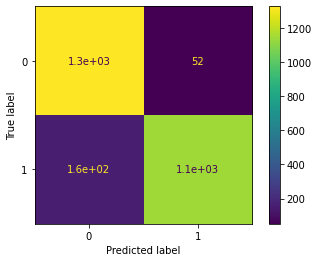

In [ ]:
plot_confusion_matrix(model, X_test, Y_test)  

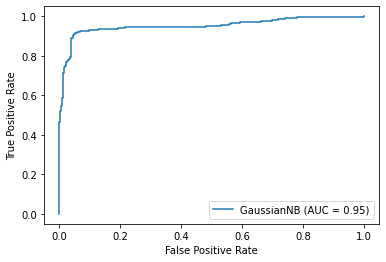

In [ ]:
plot_roc_curve(model, X_test, Y_test) 

In [ ]:
from  sklearn.metrics import f1_score, recall_score

In [ ]:
f1_score(Y_test, y_pred)

0.9151321056845475

In [ ]:
recall_score(Y_test, y_pred)

0.8772064466615502

##K-Vecinos


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
y_pred = neigh.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.9966430436404327


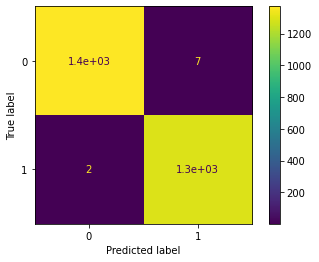

In [ ]:
plot_confusion_matrix(neigh, X_test, Y_test) 

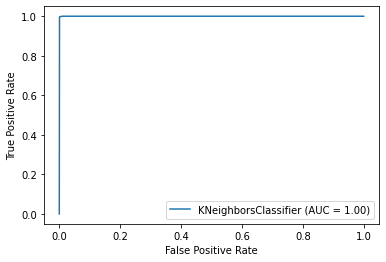

In [ ]:
plot_roc_curve(neigh, X_test, Y_test)

In [ ]:
f1_score(Y_test, y_pred)

0.9965530448104174

In [ ]:
recall_score(Y_test, y_pred)

0.9984650805832693

## SVM

In [ ]:
from sklearn.svm import NuSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
clf = make_pipeline(StandardScaler(), NuSVC())

In [ ]:
clf.fit(X_train, Y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('nusvc',
                 NuSVC(break_ties=False, cache_size=200, class_weight=None,
                       coef0=0.0, decision_function_shape='ovr', degree=3,
                       gamma='scale', kernel='rbf', max_iter=-1, nu=0.5,
                       probability=False, random_state=None, shrinking=True,
                       tol=0.001, verbose=False))],
         verbose=False)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.9183140619171951


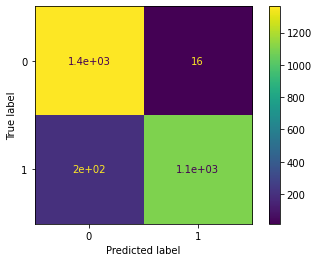

In [ ]:
plot_confusion_matrix(clf, X_test, Y_test) 

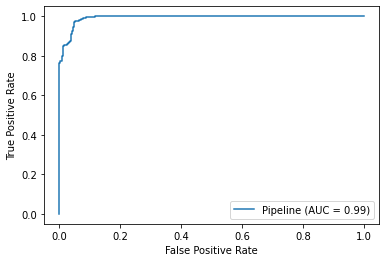

In [ ]:
plot_roc_curve(clf, X_test, Y_test)

In [ ]:
f1_score(Y_test, y_pred)

0.909466721785862

In [ ]:
recall_score(Y_test, y_pred)

0.8442056792018419

## Random forests

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf = RandomForestClassifier(max_depth=5, random_state=0)

In [ ]:
clf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.9914211115255501


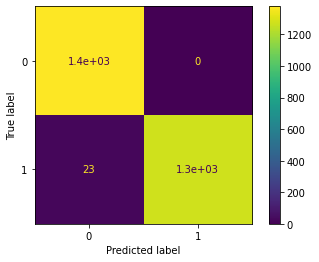

In [ ]:
plot_confusion_matrix(clf, X_test, Y_test) 

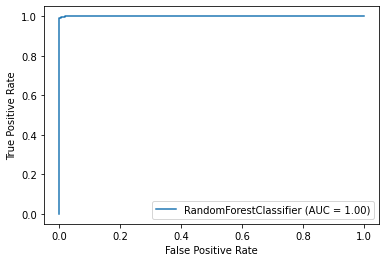

In [ ]:
plot_roc_curve(clf, X_test, Y_test)

In [ ]:
f1_score(Y_test, y_pred)

0.9910956252419667

In [ ]:
recall_score(Y_test, y_pred)

0.9823484267075978

In [ ]:
clf.feature_importances_

array([0.00255211, 0.00731759, 0.00880704, 0.05161158, 0.15927698,
       0.00265803, 0.03744032, 0.12986349, 0.13334372, 0.01832834,
       0.06143325, 0.06026283, 0.03902008, 0.01292892, 0.01128761,
       0.01412255, 0.06330249, 0.09767705, 0.06541253, 0.02335347])